In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.ensemble import RandomForestClassifier


- Data Profiling
- Data Cleaning
    - Duplicated Records
    - Missing Values
    - Invalid Values
    - Adjust Datatypes
    - Variables with Single Value
    - Balance Dataset
- Feature Engineering
    - Data Transformation
    - Encoding Categorical Variables
    - Numerical Variables
    - Distribution
    - Outliers
    - Log Transformation
    - Normalization/Standardization
    - Discretization
    - Correlation
- Drop Variables that are not needed
- Run AutoML

# Load Data

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Add a column indicating the source DataFrame
train_df['source'] = 'train_df'
test_df['source'] = 'test_df'

df = pd.concat([train_df, test_df], axis=0, ignore_index=True)
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
861,862,0.0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S,train_df
135,136,0.0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C,train_df
1244,1245,NaN,2,"Herman, Mr. Samuel",male,49.0,1,2,220845,65.0000,NaN,S,test_df
1157,1158,NaN,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S,test_df
183,184,1.0,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S,train_df
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,train_df
658,659,0.0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S,train_df
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,train_df
676,677,0.0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.0500,NaN,S,train_df
117,118,0.0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S,train_df


# Data Exploration

In [6]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  source       1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB
None


Null Values Age, Cabin, Embarked

In [7]:
df.nunique()

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
source            2
dtype: int64

Checking Names to see if there are interesting patterns like Master, Count, Countess, Dr., Rev

Is there a partner on board

In [8]:
name_list = sorted(df.Name.tolist())
name_list[:10]

['Abbing, Mr. Anthony',
 'Abbott, Master. Eugene Joseph',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelseth, Miss. Karen Marie',
 'Abelseth, Mr. Olaus Jorgensen',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Abrahamsson, Mr. Abraham August Johannes',
 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)']

In [9]:
# Exchange train_df to test_df
feature_df = df.copy()

In [10]:
# List of titles
title_list = ['Master.', 'Count.', 'Countess.', 'Dr.', 'Rev.', 'Capt.', 'Major', 'Lady', 'Oberst']

def flag_titles(name, titles):
    """
    Check if the name contains any of the titles in the list.
    
    Parameters:
    - name: str
        The name to check.
    - titles: list of str
        The list of titles to check against.
        
    Returns:
    - bool
        True if the name contains any of the titles, False otherwise.
    """
    for title in titles:
        if title in name:
            return 1
    return 0

# Apply the function to the DataFrame
feature_df['title_flag'] = feature_df['Name'].apply(flag_titles, titles=title_list)
feature_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,title_flag
663,664,0.0,3,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S,train_df,0
910,911,NaN,3,"Assaf Khalil, Mrs. Mariana (Miriam"")""",female,45.0,0,0,2696,7.2250,NaN,C,test_df,0
583,584,0.0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C,train_df,0
705,706,0.0,2,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0,0,250655,26.0000,NaN,S,train_df,0
717,718,1.0,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.0,0,0,34218,10.5000,E101,S,train_df,0
725,726,0.0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S,train_df,0
1016,1017,NaN,3,"Cribb, Miss. Laura Alice",female,17.0,0,1,371362,16.1000,NaN,S,test_df,0
832,833,0.0,3,"Saad, Mr. Amin",male,NaN,0,0,2671,7.2292,NaN,C,train_df,0
1268,1269,NaN,2,"Cotterill, Mr. Henry Harry""""",male,21.0,0,0,29107,11.5000,NaN,S,test_df,0
303,304,1.0,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q,train_df,0


In [11]:
# Function to extract names within brackets
def extract_bracketed_names(name):
    parts = name.split('(')
    if len(parts) > 1:
        bracketed_name = parts[1].replace(')', '').strip()
        return bracketed_name
    return None

# Function to remove bracketed names from the original Name column
def remove_bracketed_names(name):
    return name.split('(')[0].strip()

# Apply functions to create new columns
feature_df['bracketed_names'] = feature_df['Name'].apply(extract_bracketed_names)
feature_df['Name'] = feature_df['Name'].apply(remove_bracketed_names)
feature_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,title_flag,bracketed_names
1226,1227,NaN,1,"Maguire, Mr. John Edward",male,30.0,0,0,110469,26.0000,C106,S,test_df,0,None
255,256,1.0,3,"Touma, Mrs. Darwis",female,29.0,0,2,2650,15.2458,NaN,C,train_df,0,Hanne Youssef Razi
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test_df,0,None
361,362,0.0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,NaN,C,train_df,0,None
295,296,0.0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C,train_df,0,None
33,34,0.0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,train_df,0,None
141,142,1.0,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S,train_df,0,None
1117,1118,NaN,3,"Asplund, Mr. Johan Charles",male,23.0,0,0,350054,7.7958,NaN,S,test_df,0,None
780,781,1.0,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C,train_df,0,None
995,996,NaN,3,"Thomas, Mrs. Alexander",female,16.0,1,1,2625,8.5167,NaN,C,test_df,0,"Thamine Thelma"""""


In [12]:
def extract_last_names(name):
    parts = name.split(',')
    return parts[0]

def remove_last_names(name):
    return name.split(',')[1].strip()

feature_df['last_name'] = feature_df['Name'].apply(extract_last_names)
feature_df['Name'] = feature_df['Name'].apply(remove_last_names)
feature_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,title_flag,bracketed_names,last_name
379,380,0.0,3,Mr. Karl Gideon,male,19.00,0,0,347069,7.7750,NaN,S,train_df,0,None,Gustafsson
1159,1160,NaN,3,Miss. May Elizabeth,female,NaN,0,0,A. 2. 39186,8.0500,NaN,S,test_df,0,None,Howard
435,436,1.0,1,Miss. Lucile Polk,female,14.00,1,2,113760,120.0000,B96 B98,S,train_df,0,None,Carter
196,197,0.0,3,Mr. Robert,male,NaN,0,0,368703,7.7500,NaN,Q,train_df,0,None,Mernagh
1196,1197,NaN,1,Mrs. Edward Gifford,female,64.00,1,1,112901,26.5500,B26,S,test_df,0,Catherine Elizabeth Halstead,Crosby
427,428,1.0,2,Miss. Kate Florence,female,19.00,0,0,250655,26.0000,NaN,S,train_df,0,"""Mrs Kate Louise Phillips Marshall""",Phillips
257,258,1.0,1,Miss. Gladys,female,30.00,0,0,110152,86.5000,B77,S,train_df,0,None,Cherry
469,470,1.0,3,Miss. Helene Barbara,female,0.75,2,1,2666,19.2583,NaN,C,train_df,0,None,Baclini
309,310,1.0,1,Miss. Laura Mabel,female,30.00,0,0,PC 17485,56.9292,E36,C,train_df,0,None,Francatelli
807,808,0.0,3,Miss. Ellen Natalia,female,18.00,0,0,347087,7.7750,NaN,S,train_df,0,None,Pettersson


In [13]:
def extract_titles(name):
    parts = name.split('.')
    return parts[0]

def remove_titles(name):
    return name.split('.')[1].strip()

feature_df['title'] = feature_df['Name'].apply(extract_titles)
feature_df['Name'] = feature_df['Name'].apply(remove_titles)
feature_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,title_flag,bracketed_names,last_name,title
266,267,0.0,3,Ernesti Arvid,male,16.0,4,1,3101295,39.6875,NaN,S,train_df,0,None,Panula,Mr
562,563,0.0,2,Robert Douglas,male,28.0,0,0,218629,13.5000,NaN,S,train_df,0,None,Norman,Mr
129,130,0.0,3,Johan,male,45.0,0,0,347061,6.9750,NaN,S,train_df,0,None,Ekstrom,Mr
20,21,0.0,2,Joseph J,male,35.0,0,0,239865,26.0000,NaN,S,train_df,0,None,Fynney,Mr
1292,1293,NaN,2,Harry,male,38.0,1,0,28664,21.0000,NaN,S,test_df,0,None,Gale,Mr
1127,1128,NaN,1,Frank Manley,male,64.0,1,0,110813,75.2500,D37,C,test_df,0,None,Warren,Mr
666,667,0.0,2,Reginald Fenton,male,25.0,0,0,234686,13.0000,NaN,S,train_df,0,None,Butler,Mr
1025,1026,NaN,3,Valtcho,male,43.0,0,0,349226,7.8958,NaN,S,test_df,0,None,Dintcheff,Mr
23,24,1.0,1,William Thompson,male,28.0,0,0,113788,35.5000,A6,S,train_df,0,None,Sloper,Mr
429,430,1.0,3,Berk,male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,train_df,0,Berk Trembisky,Pickard,Mr


In [14]:
feature_df['partner_tag'] = feature_df.groupby(['Name', 'last_name']).ngroup()
feature_df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source,title_flag,bracketed_names,last_name,title,partner_tag
750,751,1.0,2,Joan,female,4.0,1,1,29103,23.0000,NaN,S,train_df,0,None,Wells,Miss,603
799,800,0.0,3,Jean Baptiste,female,30.0,1,1,345773,24.1500,NaN,S,train_df,0,Rosalie Paula Govaert,Van Impe,Mrs,590
1056,1057,NaN,3,Anton,female,26.0,1,1,315153,22.0250,NaN,S,test_df,0,Luise Heilmann,Kink-Heilmann,Mrs,112
813,814,0.0,3,Ebba Iris Alfrida,female,6.0,4,2,347082,31.2750,NaN,S,train_df,0,None,Andersson,Miss,261
826,827,0.0,3,Len,male,NaN,0,0,1601,56.4958,NaN,S,train_df,0,None,Lam,Mr,754
150,151,0.0,2,Robert James,male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,train_df,1,None,Bateman,Rev,996
402,403,0.0,3,Mari Aina,female,21.0,1,0,4137,9.8250,NaN,S,train_df,0,None,Jussila,Miss,811
15,16,1.0,2,,female,55.0,0,0,248706,16.0000,NaN,S,train_df,0,Mary D Kingcome,Hewlett,Mrs,7
1190,1191,NaN,3,Nils,male,29.0,0,0,347467,7.8542,NaN,S,test_df,0,None,Johansson,Mr,893
943,944,NaN,2,"Ellen Nellie""""",female,20.0,2,1,29105,23.0000,NaN,S,test_df,0,None,Hocking,Miss,324


In [15]:
# Create cabin_flag column: 0 for no cabin, 1 for cabin
feature_df['cabin_flag'] = feature_df['Cabin'].notnull().astype(int)

In [16]:
feature_df.nunique()

PassengerId        1309
Survived              2
Pclass                3
Name                968
Sex                   2
Age                  98
SibSp                 7
Parch                 8
Ticket              929
Fare                281
Cabin               186
Embarked              3
source                2
title_flag            2
bracketed_names     220
last_name           875
title                18
partner_tag        1211
cabin_flag            2
dtype: int64

In [17]:
# Split 'Ticket' into 'Ticket_Letters' and 'Ticket_Numbers'
feature_df['Ticket_Letters'] = feature_df['Ticket'].str.extract('([A-Za-z\.]*)', expand=False).str.strip()
feature_df['Ticket_Numbers'] = feature_df['Ticket'].str.extract('(\d+)', expand=False).str.strip()

# Remove periods and convert to lowercase
feature_df['Ticket_Letters'] = feature_df['Ticket_Letters'].str.replace('.', '', regex=False).str.lower()

In [18]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      1309 non-null   int64  
 1   Survived         891 non-null    float64
 2   Pclass           1309 non-null   int64  
 3   Name             1309 non-null   object 
 4   Sex              1309 non-null   object 
 5   Age              1046 non-null   float64
 6   SibSp            1309 non-null   int64  
 7   Parch            1309 non-null   int64  
 8   Ticket           1309 non-null   object 
 9   Fare             1308 non-null   float64
 10  Cabin            295 non-null    object 
 11  Embarked         1307 non-null   object 
 12  source           1309 non-null   object 
 13  title_flag       1309 non-null   int64  
 14  bracketed_names  221 non-null    object 
 15  last_name        1309 non-null   object 
 16  title            1309 non-null   object 
 17  partner_tag   

In [19]:
# Group by 'Ticket_Letters' and count
feature_df['Ticket_Letters'].value_counts().sort_index()

         957
a         40
aq         2
c          8
ca        69
fa         1
fc         3
fcc        9
line       4
lp         1
p          2
pc        92
pp         4
sc        29
sco        1
so         8
soc        7
sop        1
soton     27
sp         1
ston      22
sw         2
w         15
we         2
wep        2
Name: Ticket_Letters, dtype: int64

In [20]:
# Combine similar ticket letters
def combine_ticket_letters(ticket):
    if ticket in ['a', 'aq']:
        return 'a'
    elif ticket in ['pc', 'pp']:
        return 'p'
    elif ticket in ['sp', 'sw', 'sc', 'sco', 'soc', 'so', 'soton', 'ston', 'sop']:
        return 's'
    elif ticket in ['ca', 'c']:
        return 'c'
    elif ticket in ['we', 'wep', 'w']:
        return 'w'
    elif ticket in ['fa', 'fc', 'fcc']:
        return 'f'
    elif ticket in ['line', 'lp']:
        return 'l'
    else:
        return ticket

feature_df['Ticket_Letters'] = feature_df['Ticket_Letters'].apply(combine_ticket_letters)
# Group by 'Ticket_Letters' and count
feature_df['Ticket_Letters'].value_counts().sort_index()

     957
a     42
c     77
f     13
l      5
p     98
s     98
w     19
Name: Ticket_Letters, dtype: int64

In [21]:
def flag_ticket_letters(ticket):
    if ticket:
        return 1
    else:
        return 0

feature_df['ticket_letters_flag'] = feature_df['Ticket_Letters'].apply(flag_ticket_letters)
feature_df['ticket_letters_flag'].value_counts().sort_index()

0    957
1    352
Name: ticket_letters_flag, dtype: int64

# Fill Age with median of Pclass+Sex+Embarked

In [22]:
missing_df = feature_df
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          1309 non-null   int64  
 1   Survived             891 non-null    float64
 2   Pclass               1309 non-null   int64  
 3   Name                 1309 non-null   object 
 4   Sex                  1309 non-null   object 
 5   Age                  1046 non-null   float64
 6   SibSp                1309 non-null   int64  
 7   Parch                1309 non-null   int64  
 8   Ticket               1309 non-null   object 
 9   Fare                 1308 non-null   float64
 10  Cabin                295 non-null    object 
 11  Embarked             1307 non-null   object 
 12  source               1309 non-null   object 
 13  title_flag           1309 non-null   int64  
 14  bracketed_names      221 non-null    object 
 15  last_name            1309 non-null   o

In [23]:
missing_df['Age'] = feature_df.groupby(['Pclass', 'Sex'])['Age'].apply(lambda x: x.fillna(x.median()))
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          1309 non-null   int64  
 1   Survived             891 non-null    float64
 2   Pclass               1309 non-null   int64  
 3   Name                 1309 non-null   object 
 4   Sex                  1309 non-null   object 
 5   Age                  1309 non-null   float64
 6   SibSp                1309 non-null   int64  
 7   Parch                1309 non-null   int64  
 8   Ticket               1309 non-null   object 
 9   Fare                 1308 non-null   float64
 10  Cabin                295 non-null    object 
 11  Embarked             1307 non-null   object 
 12  source               1309 non-null   object 
 13  title_flag           1309 non-null   int64  
 14  bracketed_names      221 non-null    object 
 15  last_name            1309 non-null   o

In [24]:
missing_df[missing_df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,source,title_flag,bracketed_names,last_name,title,partner_tag,cabin_flag,Ticket_Letters,Ticket_Numbers,ticket_letters_flag


In [25]:
# show rows with missing embarked information

missing_df[missing_df["Embarked"].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,source,title_flag,bracketed_names,last_name,title,partner_tag,cabin_flag,Ticket_Letters,Ticket_Numbers,ticket_letters_flag
61,62,1.0,1,Amelie,female,38.0,0,0,113572,80.0,...,train_df,0,None,Icard,Miss,87,1,,113572,0
829,830,1.0,1,George Nelson,female,62.0,0,0,113572,80.0,...,train_df,0,Martha Evelyn,Stone,Mrs,436,1,,113572,0


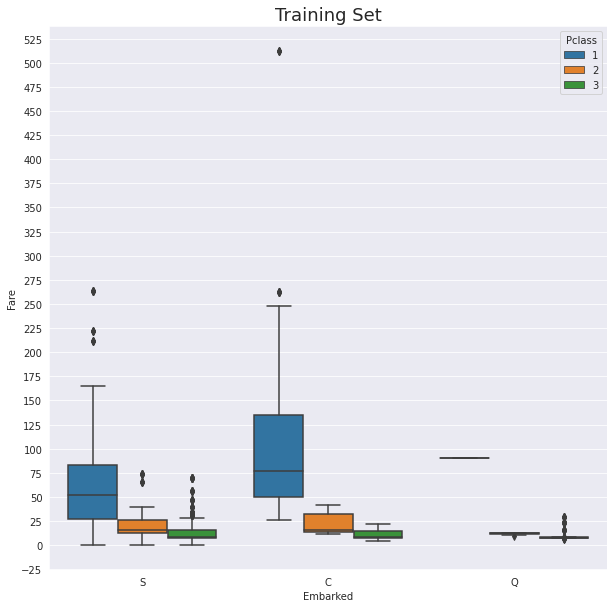

In [26]:
import matplotlib.ticker as ticker

sns.set_style('darkgrid')
ax = plt.figure(figsize=(10,10))
ax = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=missing_df)
ax.set_title("Training Set", fontsize = 18)
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))

From the boxplot comparison, The value of 'C' has the closest average to 80, so we will be assigning 'C' as the two passengers' 'Embarkment' value.


In [27]:
#Assign the values
missing_df.at[61, 'Embarked'] = 'C'
missing_df.at[829, 'Embarked'] = 'C'
missing_df.iloc[[61, 829], :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,source,title_flag,bracketed_names,last_name,title,partner_tag,cabin_flag,Ticket_Letters,Ticket_Numbers,ticket_letters_flag
61,62,1.0,1,Amelie,female,38.0,0,0,113572,80.0,...,train_df,0,None,Icard,Miss,87,1,,113572,0
829,830,1.0,1,George Nelson,female,62.0,0,0,113572,80.0,...,train_df,0,Martha Evelyn,Stone,Mrs,436,1,,113572,0


Let's continue 'Age' feature in the train dataset. Idea: Inputation Median Age based on title.

In [28]:
missing_df['Fare'] = feature_df.groupby(['Pclass', 'Sex', 'Embarked'])['Fare'].apply(lambda x: x.fillna(x.median()))
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          1309 non-null   int64  
 1   Survived             891 non-null    float64
 2   Pclass               1309 non-null   int64  
 3   Name                 1309 non-null   object 
 4   Sex                  1309 non-null   object 
 5   Age                  1309 non-null   float64
 6   SibSp                1309 non-null   int64  
 7   Parch                1309 non-null   int64  
 8   Ticket               1309 non-null   object 
 9   Fare                 1309 non-null   float64
 10  Cabin                295 non-null    object 
 11  Embarked             1309 non-null   object 
 12  source               1309 non-null   object 
 13  title_flag           1309 non-null   int64  
 14  bracketed_names      221 non-null    object 
 15  last_name            1309 non-null   o

In [29]:
missing_df[missing_df['Ticket_Numbers'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,source,title_flag,bracketed_names,last_name,title,partner_tag,cabin_flag,Ticket_Letters,Ticket_Numbers,ticket_letters_flag
179,180,0.0,3,Lionel,male,36.0,0,0,LINE,0.0,...,train_df,0,None,Leonard,Mr,773,0,l,NaN,1
271,272,1.0,3,William Henry,male,25.0,0,0,LINE,0.0,...,train_df,0,None,Tornquist,Mr,1183,0,l,NaN,1
302,303,0.0,3,William Cahoone Jr,male,19.0,0,0,LINE,0.0,...,train_df,0,None,Johnson,Mr,1169,0,l,NaN,1
597,598,0.0,3,Alfred,male,49.0,0,0,LINE,0.0,...,train_df,0,None,Johnson,Mr,60,0,l,NaN,1


In [30]:
missing_df = missing_df.dropna(subset=['Ticket_Numbers'])
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 1308
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          1305 non-null   int64  
 1   Survived             887 non-null    float64
 2   Pclass               1305 non-null   int64  
 3   Name                 1305 non-null   object 
 4   Sex                  1305 non-null   object 
 5   Age                  1305 non-null   float64
 6   SibSp                1305 non-null   int64  
 7   Parch                1305 non-null   int64  
 8   Ticket               1305 non-null   object 
 9   Fare                 1305 non-null   float64
 10  Cabin                295 non-null    object 
 11  Embarked             1305 non-null   object 
 12  source               1305 non-null   object 
 13  title_flag           1305 non-null   int64  
 14  bracketed_names      221 non-null    object 
 15  last_name            1305 non-null   o

# Encode objects

In [31]:
encode_df = missing_df

In [32]:
def encode_object_columns(df, columns_to_encode, method='label'):
    """
    Encodes categorical columns into numerical values using the specified method.

    Parameters:
    - df: pandas.DataFrame
        The DataFrame containing the data.
    - columns_to_encode: list of str
        List of categorical columns to encode.
    - method: str, optional
        Encoding method, either 'label' or 'onehot'. Default is 'label'.

    Returns:
    - pandas.DataFrame
        DataFrame with encoded categorical columns.
    """
    df_encoded = df.copy()
    
    if method == 'label':
        le = LabelEncoder()
        for col in columns_to_encode:
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    
    elif method == 'onehot':
        df_encoded = pd.get_dummies(df_encoded, columns=columns_to_encode)
    
    else:
        raise ValueError("Invalid method. Choose 'label' or 'onehot'.")

    print(f"By using the {method} method, the following columns have been encoded: {columns_to_encode}.")

    return df_encoded

In [33]:
encode_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 1308
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          1305 non-null   int64  
 1   Survived             887 non-null    float64
 2   Pclass               1305 non-null   int64  
 3   Name                 1305 non-null   object 
 4   Sex                  1305 non-null   object 
 5   Age                  1305 non-null   float64
 6   SibSp                1305 non-null   int64  
 7   Parch                1305 non-null   int64  
 8   Ticket               1305 non-null   object 
 9   Fare                 1305 non-null   float64
 10  Cabin                295 non-null    object 
 11  Embarked             1305 non-null   object 
 12  source               1305 non-null   object 
 13  title_flag           1305 non-null   int64  
 14  bracketed_names      221 non-null    object 
 15  last_name            1305 non-null   o

In [34]:
encode_df = encode_object_columns(encode_df, ['Sex', 'Embarked'], method='onehot')
encode_df.info()

By using the onehot method, the following columns have been encoded: ['Sex', 'Embarked'].
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 1308
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          1305 non-null   int64  
 1   Survived             887 non-null    float64
 2   Pclass               1305 non-null   int64  
 3   Name                 1305 non-null   object 
 4   Age                  1305 non-null   float64
 5   SibSp                1305 non-null   int64  
 6   Parch                1305 non-null   int64  
 7   Ticket               1305 non-null   object 
 8   Fare                 1305 non-null   float64
 9   Cabin                295 non-null    object 
 10  source               1305 non-null   object 
 11  title_flag           1305 non-null   int64  
 12  bracketed_names      221 non-null    object 
 13  last_name            1305 non-null   object 
 14

# Drop not needed columns

In [35]:
drop_df = encode_df

In [36]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 1308
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          1305 non-null   int64  
 1   Survived             887 non-null    float64
 2   Pclass               1305 non-null   int64  
 3   Name                 1305 non-null   object 
 4   Age                  1305 non-null   float64
 5   SibSp                1305 non-null   int64  
 6   Parch                1305 non-null   int64  
 7   Ticket               1305 non-null   object 
 8   Fare                 1305 non-null   float64
 9   Cabin                295 non-null    object 
 10  source               1305 non-null   object 
 11  title_flag           1305 non-null   int64  
 12  bracketed_names      221 non-null    object 
 13  last_name            1305 non-null   object 
 14  title                1305 non-null   object 
 15  partner_tag          1305 non-null   i

In [37]:
drop_df.drop(columns=['Name', 'bracketed_names', 'last_name', 'Cabin', 'Ticket', 'Ticket_Numbers', 'Ticket_Letters', 'partner_tag', 'title', 'Sex_male'], inplace=True)
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1305 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          1305 non-null   int64  
 1   Survived             887 non-null    float64
 2   Pclass               1305 non-null   int64  
 3   Age                  1305 non-null   float64
 4   SibSp                1305 non-null   int64  
 5   Parch                1305 non-null   int64  
 6   Fare                 1305 non-null   float64
 7   source               1305 non-null   object 
 8   title_flag           1305 non-null   int64  
 9   cabin_flag           1305 non-null   int64  
 10  ticket_letters_flag  1305 non-null   int64  
 11  Sex_female           1305 non-null   uint8  
 12  Embarked_C           1305 non-null   uint8  
 13  Embarked_Q           1305 non-null   uint8  
 14  Embarked_S           1305 non-null   uint8  
dtypes: float64(3), int64(7), object(1), ui

In [38]:
ml_train_df = drop_df[drop_df['source'] == 'train_df'].copy()
ml_train_df.drop(columns=['source'], inplace=True)
ml_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          887 non-null    int64  
 1   Survived             887 non-null    float64
 2   Pclass               887 non-null    int64  
 3   Age                  887 non-null    float64
 4   SibSp                887 non-null    int64  
 5   Parch                887 non-null    int64  
 6   Fare                 887 non-null    float64
 7   title_flag           887 non-null    int64  
 8   cabin_flag           887 non-null    int64  
 9   ticket_letters_flag  887 non-null    int64  
 10  Sex_female           887 non-null    uint8  
 11  Embarked_C           887 non-null    uint8  
 12  Embarked_Q           887 non-null    uint8  
 13  Embarked_S           887 non-null    uint8  
dtypes: float64(3), int64(7), uint8(4)
memory usage: 79.7 KB


In [39]:
ml_test_df = drop_df[drop_df['source'] == 'test_df'].copy()
ml_test_df.drop(columns=['source', 'Survived'], inplace=True)
ml_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Pclass               418 non-null    int64  
 2   Age                  418 non-null    float64
 3   SibSp                418 non-null    int64  
 4   Parch                418 non-null    int64  
 5   Fare                 418 non-null    float64
 6   title_flag           418 non-null    int64  
 7   cabin_flag           418 non-null    int64  
 8   ticket_letters_flag  418 non-null    int64  
 9   Sex_female           418 non-null    uint8  
 10  Embarked_C           418 non-null    uint8  
 11  Embarked_Q           418 non-null    uint8  
 12  Embarked_S           418 non-null    uint8  
dtypes: float64(2), int64(7), uint8(4)
memory usage: 34.3 KB


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(df, columns, bins=10):
    """
    Plots histograms for selected columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): The list of column names to plot histograms for.
    bins (int): Number of bins for the histograms.
    """
    for column in columns:
        if column in df.columns:
            plt.figure(figsize=(10, 6))
            sns.histplot(df[column], bins=bins, kde=True)
            plt.title(f'Histogram for {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.show()
        else:
            print(f"Column '{column}' not found in the DataFrame.")

# Example usage
# selected_columns = ['Age', 'Fare', 'Pclass']
# plot_histograms(ml_train_df, selected_columns, bins=15)


In [41]:
ml_train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 890
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          887 non-null    int64  
 1   Survived             887 non-null    float64
 2   Pclass               887 non-null    int64  
 3   Age                  887 non-null    float64
 4   SibSp                887 non-null    int64  
 5   Parch                887 non-null    int64  
 6   Fare                 887 non-null    float64
 7   title_flag           887 non-null    int64  
 8   cabin_flag           887 non-null    int64  
 9   ticket_letters_flag  887 non-null    int64  
 10  Sex_female           887 non-null    uint8  
 11  Embarked_C           887 non-null    uint8  
 12  Embarked_Q           887 non-null    uint8  
 13  Embarked_S           887 non-null    uint8  
dtypes: float64(3), int64(7), uint8(4)
memory usage: 79.7 KB


In [42]:
selected_columns = ['Age', 'Fare']

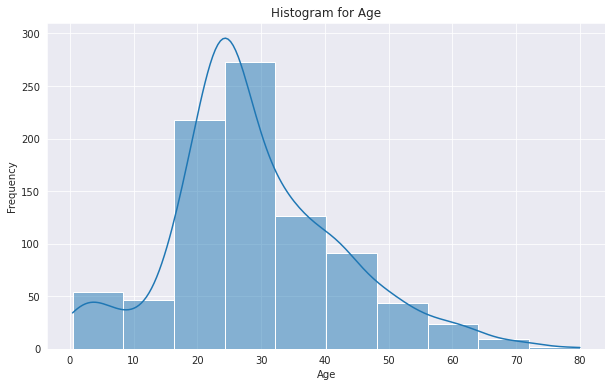

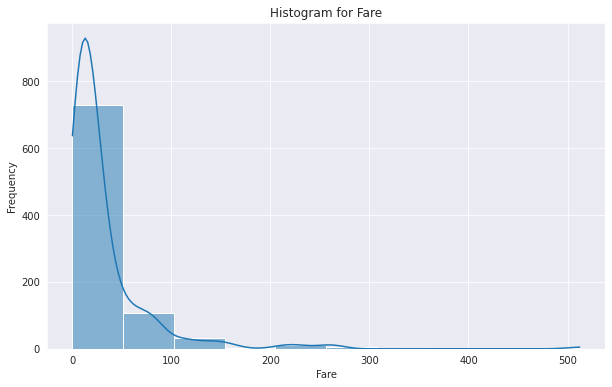

In [43]:
plot_histograms(ml_train_df, selected_columns)

In [44]:
def calculate_outliers(df, columns):
    """
    Calculate the number of outliers in selected columns of a DataFrame using the IQR method.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): The list of column names to check for outliers.

    Returns:
    dict: A dictionary with column names as keys and the number of outliers as values.
    """
    outliers_count = {}
    
    for column in columns:
        if column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outliers_count[column] = len(outliers)
        else:
            outliers_count[column] = "Column not found"
    
    return outliers_count

In [45]:
outliers = calculate_outliers(ml_train_df, selected_columns)
outliers

{'Age': 40, 'Fare': 116}

In [46]:
def get_outlier_records(df, columns):
    """
    Get outlier records in selected columns of a DataFrame using the IQR method.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): The list of column names to check for outliers.

    Returns:
    dict: A dictionary with column names as keys and DataFrames of outlier records as values.
    """
    outlier_records = {}
    
    for column in columns:
        if column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            outlier_records[column] = outliers
        else:
            outlier_records[column] = pd.DataFrame(columns=df.columns)  # Return an empty DataFrame if the column is not found
    
    return outlier_records

In [47]:
outliers = get_outlier_records(ml_train_df, selected_columns)

# Display outlier records for each selected column
for column, outlier_df in outliers.items():
    print(f"Outliers for {column}:")
    print(outlier_df)
    print("\n")


Outliers for Age:
     PassengerId  Survived  Pclass    Age  SibSp  Parch      Fare  title_flag  \
11            12       1.0       1  58.00      0      0   26.5500           0   
33            34       0.0       2  66.00      0      0   10.5000           0   
54            55       0.0       1  65.00      0      1   61.9792           0   
78            79       1.0       2   0.83      0      2   29.0000           1   
94            95       0.0       3  59.00      0      0    7.2500           0   
96            97       0.0       1  71.00      0      0   34.6542           0   
116          117       0.0       3  70.50      0      0    7.7500           0   
170          171       0.0       1  61.00      0      0   33.5000           0   
195          196       1.0       1  58.00      0      0  146.5208           0   
232          233       0.0       2  59.00      0      0   13.5000           0   
252          253       0.0       1  62.00      0      0   26.5500           0   
268       

In [48]:
def drop_outliers(df, columns):
    """
    Drop outlier records in selected columns of a DataFrame using the IQR method.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): The list of column names to check for outliers.

    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    for column in columns:
        if column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

ml_train_df_clean = drop_outliers(ml_train_df, ['Fare'])

# Display the cleaned DataFrame
print(ml_train_df_clean)


     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  title_flag  \
0              1       0.0       3  22.0      1      0   7.2500           0   
2              3       1.0       3  26.0      0      0   7.9250           0   
3              4       1.0       1  35.0      1      0  53.1000           0   
4              5       0.0       3  35.0      0      0   8.0500           0   
5              6       0.0       3  25.0      0      0   8.4583           0   
..           ...       ...     ...   ...    ...    ...      ...         ...   
886          887       0.0       2  27.0      0      0  13.0000           1   
887          888       1.0       1  19.0      0      0  30.0000           0   
888          889       0.0       3  22.0      1      2  23.4500           0   
889          890       1.0       1  26.0      0      0  30.0000           0   
890          891       0.0       3  32.0      0      0   7.7500           0   

     cabin_flag  ticket_letters_flag  Sex_female  E

In [49]:
ml_train_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 771 entries, 0 to 890
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          771 non-null    int64  
 1   Survived             771 non-null    float64
 2   Pclass               771 non-null    int64  
 3   Age                  771 non-null    float64
 4   SibSp                771 non-null    int64  
 5   Parch                771 non-null    int64  
 6   Fare                 771 non-null    float64
 7   title_flag           771 non-null    int64  
 8   cabin_flag           771 non-null    int64  
 9   ticket_letters_flag  771 non-null    int64  
 10  Sex_female           771 non-null    uint8  
 11  Embarked_C           771 non-null    uint8  
 12  Embarked_Q           771 non-null    uint8  
 13  Embarked_S           771 non-null    uint8  
dtypes: float64(3), int64(7), uint8(4)
memory usage: 69.3 KB


## Normalize selected Columns

In [50]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

def zscore_normalize(df, columns):
    """
    Apply Z-score normalization to selected columns of a DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): The list of column names to normalize.

    Returns:
    pd.DataFrame: The DataFrame with normalized columns.
    """
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Example usage
ml_train_df_normalized = zscore_normalize(ml_train_df_clean, selected_columns)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


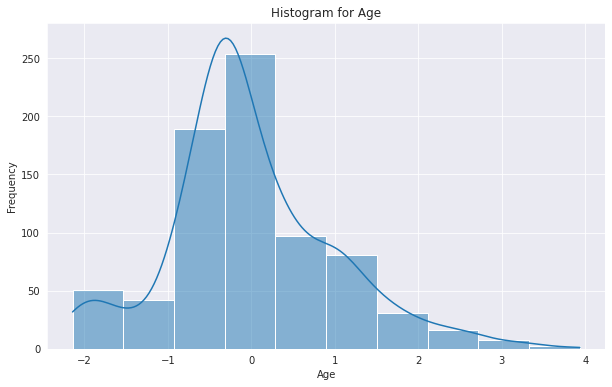

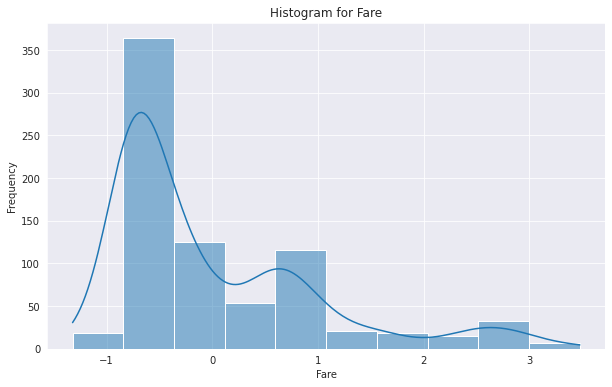

In [51]:
plot_histograms(ml_train_df_normalized, selected_columns)

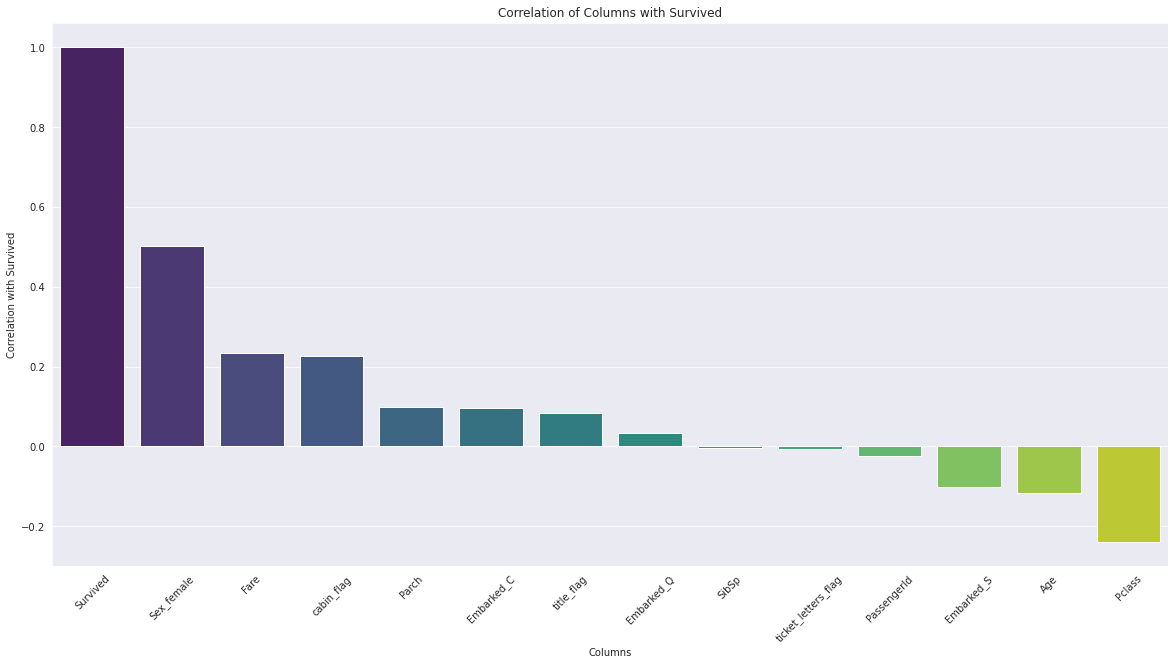

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_with_survived(df):
    """
    Plot the correlation of all columns with the 'Survived' column.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    """
    # Calculate correlations with 'Survived'
    correlation_with_survived = df.corr()['Survived'].sort_values(ascending=False)
    
    # Set up the matplotlib figure
    plt.figure(figsize=(20, 10))
    
    # Draw a bar plot
    sns.barplot(x=correlation_with_survived.index, y=correlation_with_survived.values, palette="viridis")
    
    # Set title and labels
    plt.title('Correlation of Columns with Survived')
    plt.xlabel('Columns')
    plt.ylabel('Correlation with Survived')
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.show()

# Example usage
plot_correlation_with_survived(ml_train_df_normalized)


# Run Model

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def train_and_evaluate_model(ml_train_df, ml_test_df, model_type='random_forest'):
    # Separate features and target variable from training data
    X = ml_train_df.drop(columns=['Survived'])
    y = ml_train_df['Survived']

    # Split the training data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Separate features from test data
    X_test = ml_test_df.drop(columns=['Survived'], errors='ignore')

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Choose the model based on the model_type argument
    if model_type == 'random_forest':
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_type == 'logistic_regression':
        model = LogisticRegression(random_state=42)
    elif model_type == 'svm':
        model = SVC(random_state=42)
    elif model_type == 'decision_tree':
        model = DecisionTreeClassifier(random_state=42)
    elif model_type == 'knn':
        model = KNeighborsClassifier()
    elif model_type == 'gradient_boosting':
        model = GradientBoostingClassifier(random_state=42)
    else:
        raise ValueError("Unsupported model_type. Choose from 'random_forest', 'logistic_regression', 'svm', 'decision_tree', 'knn', or 'gradient_boosting'.")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the validation data
    val_predictions = model.predict(X_val)

    # Make predictions on the test data
    test_predictions = model.predict(X_test)

    # Convert predictions to integers
    test_predictions = test_predictions.astype(int)

    # Ensure 'PassengerId' is present in ml_test_df before creating submission DataFrame
    if 'PassengerId' not in ml_test_df.columns:
        raise KeyError("PassengerId column is missing from ml_test_df")

    # Create a DataFrame with predictions to save or submit
    submission = pd.DataFrame({
        'PassengerId': ml_test_df['PassengerId'],
        'Survived': test_predictions
    })

    submission.to_csv('submission.csv', index=False)

    # Display the first few rows of the submission
    print(submission.sample(10))
    
    return model, val_predictions, y_val

def analyze_results(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('Confusion Matrix:')
    print(cm)

# Example usage
model_types = ['random_forest', 'logistic_regression', 'svm', 'decision_tree', 'knn', 'gradient_boosting']

for model_type in model_types:
    print(f"Evaluating model: {model_type}")
    model, val_predictions, y_val = train_and_evaluate_model(ml_train_df, ml_test_df, model_type=model_type)
    analyze_results(y_val, val_predictions)
    print("\n")


Evaluating model: random_forest
      PassengerId  Survived
1164         1165         1
896           897         0
953           954         0
929           930         0
992           993         0
1226         1227         0
950           951         1
1221         1222         1
1155         1156         0
988           989         0
Accuracy: 0.78
Precision: 0.78
Recall: 0.68
F1 Score: 0.73
Confusion Matrix:
[[87 15]
 [24 52]]


Evaluating model: logistic_regression
      PassengerId  Survived
902           903         0
907           908         0
950           951         1
1290         1291         0
964           965         1
1178         1179         0
909           910         1
1056         1057         1
1122         1123         1
1216         1217         0
Accuracy: 0.75
Precision: 0.71
Recall: 0.68
F1 Score: 0.70
Confusion Matrix:
[[81 21]
 [24 52]]


Evaluating model: svm
      PassengerId  Survived
1254         1255         0
1203         1204         0
992         

In [54]:
def analyze_results(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print('Confusion Matrix:')
    print(cm)

# Example usage
model, val_predictions, y_val = train_and_evaluate_model(ml_train_df, ml_test_df, model_type='random_forest')
analyze_results(y_val, val_predictions)

      PassengerId  Survived
950           951         1
1227         1228         0
962           963         0
932           933         0
1288         1289         1
1000         1001         0
982           983         0
898           899         0
909           910         0
936           937         0
Accuracy: 0.78
Precision: 0.78
Recall: 0.68
F1 Score: 0.73
Confusion Matrix:
[[87 15]
 [24 52]]
